In [12]:
#1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [13]:
#2
penguins = sns.load_dataset("penguins")

In [14]:
#3
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [15]:
#4
penguins.shape

(344, 7)

In [17]:
#5
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [18]:
#6
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [19]:
#7
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [21]:
#8 unique vale in cat_cols
cat_cols = penguins.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {penguins[col].unique()}")

species: ['Adelie' 'Chinstrap' 'Gentoo']
island: ['Torgersen' 'Biscoe' 'Dream']
sex: ['Male' 'Female' nan]


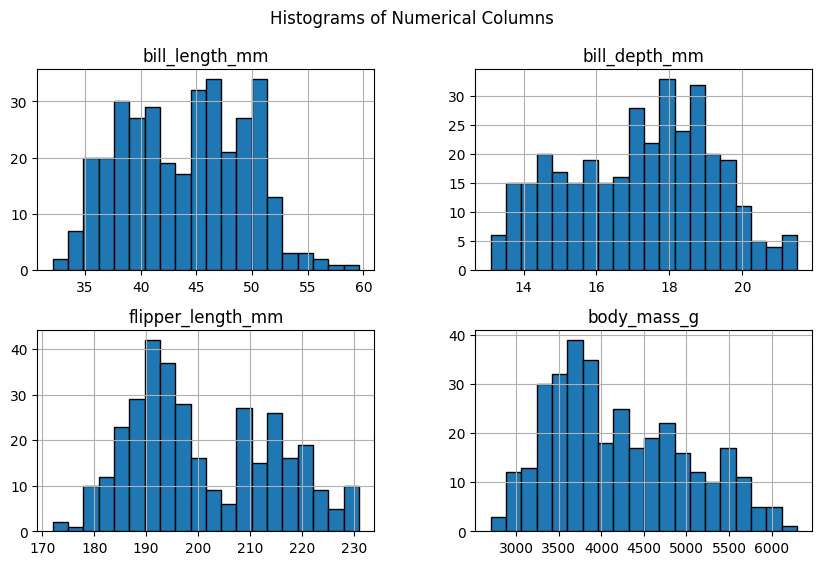

In [22]:
#9 histograms for all numerical columns

penguins.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()

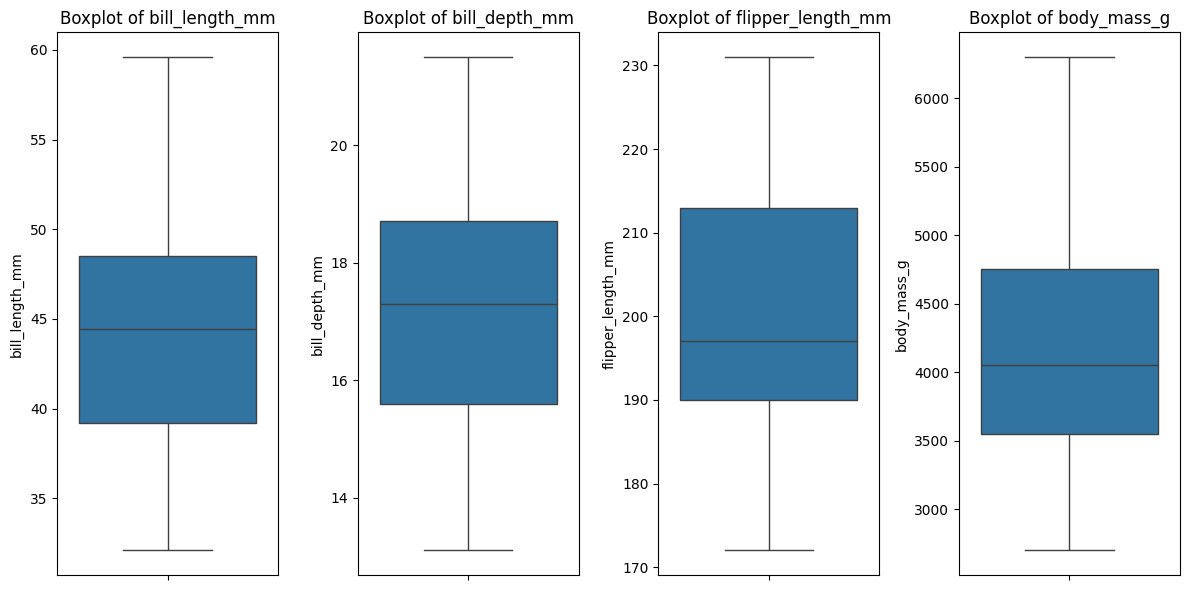

In [23]:
#10 Boxplots for numerical columns to identify outliers

plt.figure(figsize=(12, 6))
num_cols = penguins.select_dtypes(include=['float64']).columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=penguins[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

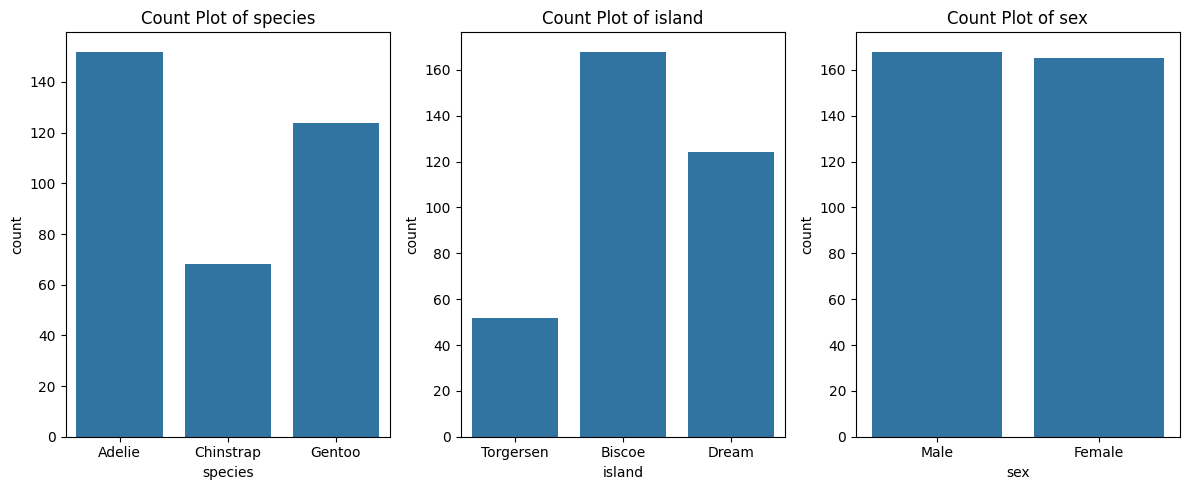

In [24]:
#11 Count plots for categorical variables

plt.figure(figsize=(12, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=penguins[col])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
#12 Skewness of numerical columns

print("\nSkewness of numerical columns:")
print(penguins.select_dtypes(include=['float64']).skew())


Skewness of numerical columns:
bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64


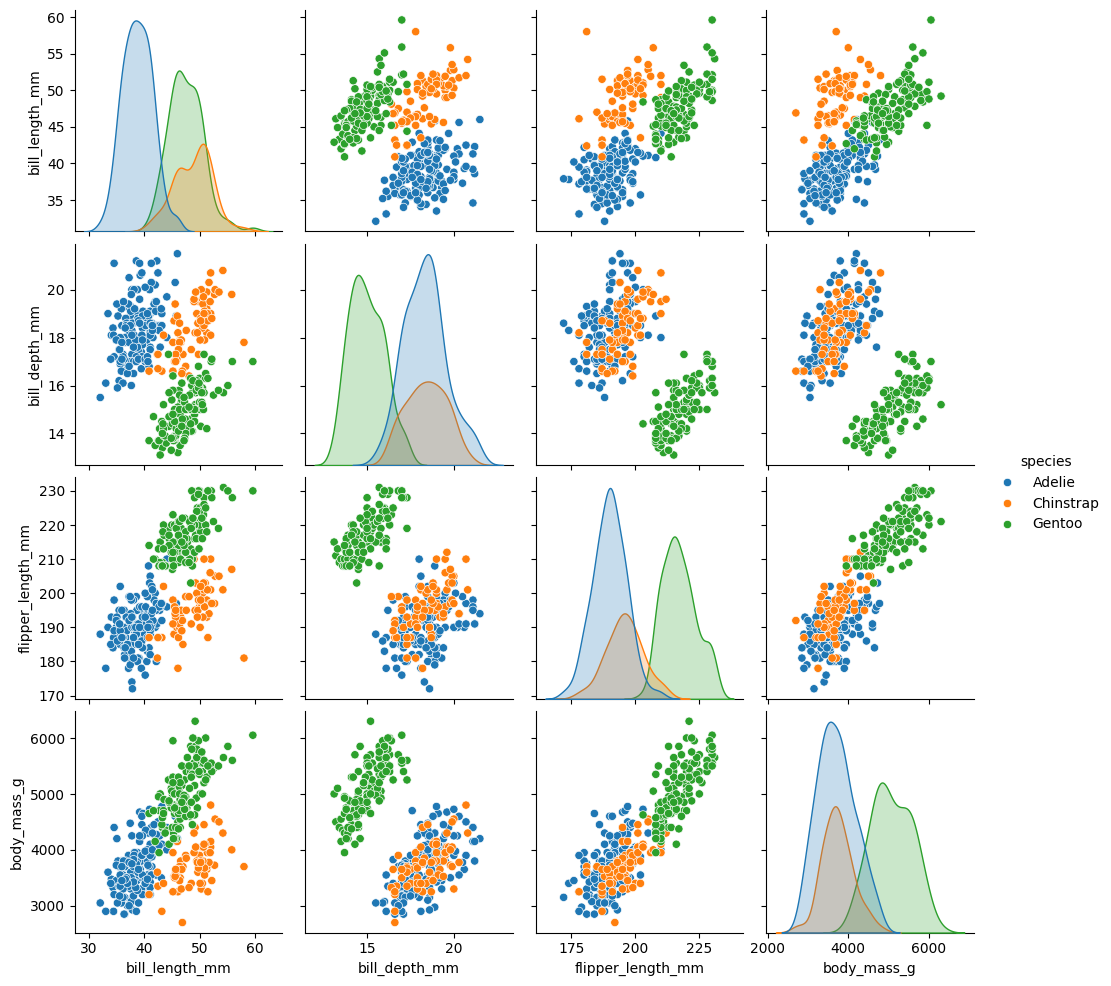

In [27]:
#13 Pairplot for numerical variables

sns.pairplot(penguins, hue="species", diag_kind="kde")
plt.show()

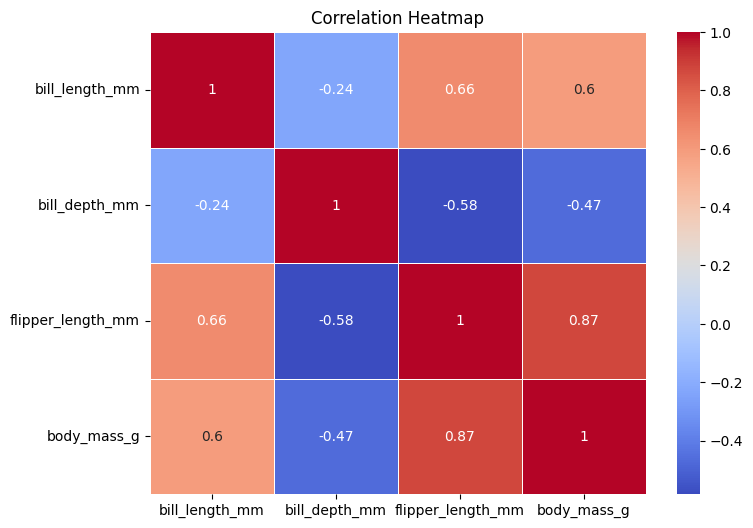

In [32]:
#14 Heatmap of the correlation matrix

num_cols = penguins.select_dtypes(include=["float64"])

plt.figure(figsize=(8, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

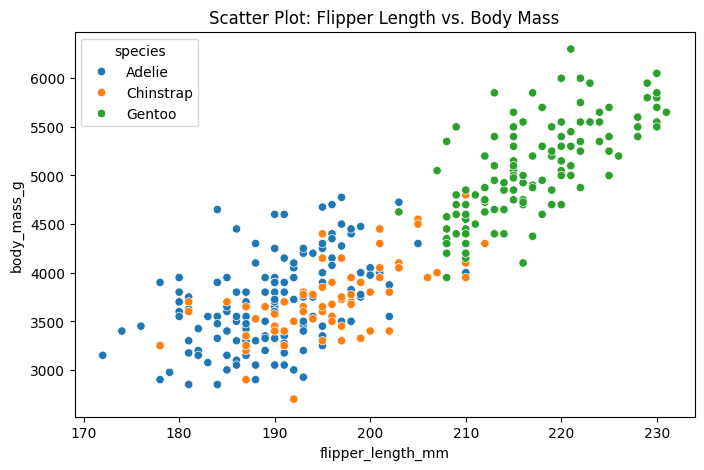

In [33]:
#15 Scatter plot between flipper length and body mass

plt.figure(figsize=(8, 5))
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=penguins)
plt.title("Scatter Plot: Flipper Length vs. Body Mass")
plt.show()

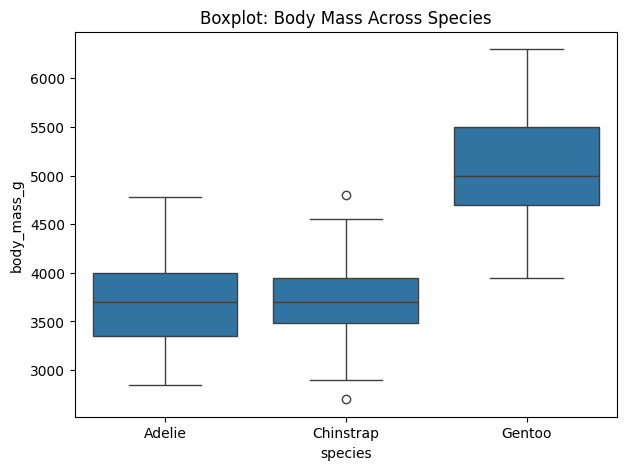

In [34]:
#16 Boxplot of body mass across species

plt.figure(figsize=(7, 5))
sns.boxplot(x="species", y="body_mass_g", data=penguins)
plt.title("Boxplot: Body Mass Across Species")
plt.show()

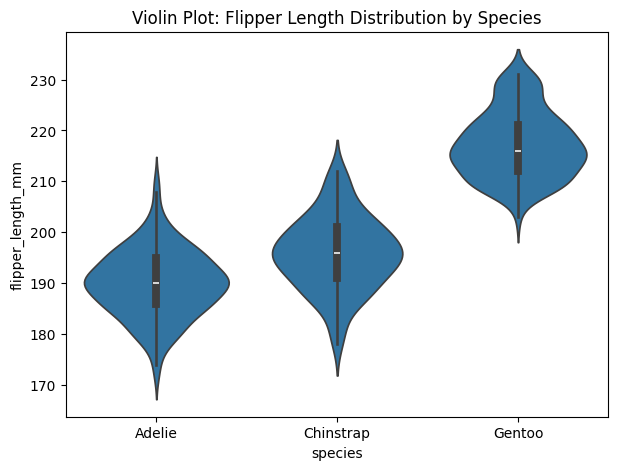

In [35]:
#17 Violin plot for flipper length by species

plt.figure(figsize=(7, 5))
sns.violinplot(x="species", y="flipper_length_mm", data=penguins)
plt.title("Violin Plot: Flipper Length Distribution by Species")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
#18 Selecting features and target variable

X = penguins.drop(columns=["species"])
y = penguins["species"]

In [38]:
#19 Encoding categorical features

X = pd.get_dummies(X, drop_first=True)

In [39]:
#20 Splitting data into train and test sets (80-20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#21 Print train-test split shapes

print("\nTrain-Test Split Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Train-Test Split Shapes:
X_train: (275, 7)
X_test: (69, 7)
y_train: (275,)
y_test: (69,)


In [41]:
#22 Standardization (Z-score Scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
#23  Convert back to DataFrame

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [43]:
#24 Display first 5 rows of standardized dataset

print("\nFirst 5 rows of standardized dataset:")
X_train_scaled_df.head()



First 5 rows of standardized dataset:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,-1.515083,-0.436577,-0.432800,-1.062531,-0.750000,-0.406515,-0.960769
1,0.538231,-0.840877,0.968940,1.179832,-0.750000,-0.406515,1.040833
2,-0.842759,1.281696,-0.432800,0.588098,-0.750000,2.459935,1.040833
3,-0.661050,0.018260,-0.572974,-1.000243,1.333333,-0.406515,-0.960769
4,0.956162,-1.043027,1.880072,1.615848,-0.750000,-0.406515,1.040833


In [44]:
#25 Normalization (Min-Max Scaling)

minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train)
X_test_normalized = minmax_scaler.transform(X_test)

In [45]:
#26  Convert back to DataFrame

X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [46]:
#27 Display first 5 rows of normalized dataset

print("\nFirst 5 rows of normalized dataset:")
X_train_normalized_df.head()



First 5 rows of normalized dataset:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,0.123636,0.369048,0.389831,0.180556,0.0,0.0,0.0
1,0.534545,0.273810,0.728814,0.680556,0.0,0.0,1.0
2,0.258182,0.773810,0.389831,0.548611,0.0,1.0,1.0
3,0.294545,0.476190,0.355932,0.194444,1.0,0.0,0.0
4,0.618182,0.226190,0.949153,0.777778,0.0,0.0,1.0
